<a href="https://colab.research.google.com/github/gabriel-cm-saldanha/Unicorn_Startups/blob/first_version/Projeto_Unicornios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **About Dataset** <p>
"Unicorn" is a term used in the venture capital industry to describe a privately held startup company with a value of over $1 billion. The term was first popularized by venture capitalist Aileen Lee, founder of Cowboy Ventures, a seed-stage venture capital fund based in Palo Alto, California.

Unicorns can also refer to a recruitment phenomenon within the human resources (HR) sector. HR managers may have high expectations to fill a position, leading them to look for candidates with qualifications that are higher than required for a specific job. In essence, these managers are looking for a unicorn, which leads to a disconnect between their ideal candidate versus who they can hire from the pool of people available.

[Download da base de dados](https://raw.githubusercontent.com/gabriel-cm-saldanha/Unicorn_Startups/main/unicorns%202022.csv)


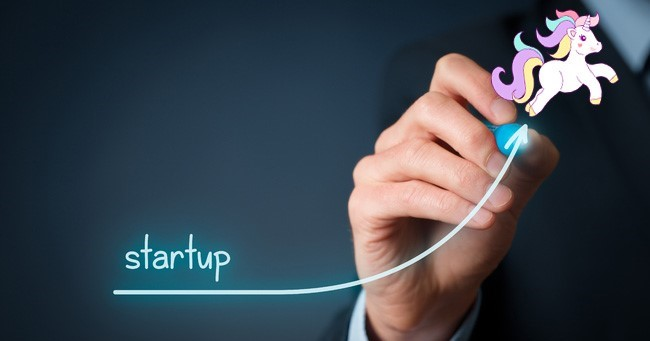

#1. Setting up Libraries

In [1]:
# Data Analysis
import pandas as pd
import numpy as np
import requests
from io import StringIO

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from plotly.subplots import make_subplots
from plotly.offline import (init_notebook_mode,
                            iplot)

import warnings
warnings.filterwarnings('ignore')


The dataset of Unicorn companies acquired only listed contents until the end of September 2022.

In [2]:
url = "https://raw.githubusercontent.com/gabriel-cm-saldanha/Unicorn_Startups/main/unicorns%202022.csv"
df = pd.read_csv(url)
df.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Investors
0,ByteDance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$127,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


#2. Basic Exploration

Let's perform a quick scan over the data.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Company         1186 non-null   object
 1   Valuation ($B)  1186 non-null   object
 2   Date Joined     1186 non-null   object
 3   Country         1186 non-null   object
 4   City            1186 non-null   object
 5   Industry        1186 non-null   object
 6   Investors       1168 non-null   object
dtypes: object(7)
memory usage: 65.0+ KB


In [4]:
df.columns

Index(['Company', 'Valuation ($B)', 'Date Joined', 'Country', 'City ',
       'Industry', 'Investors'],
      dtype='object')

In [5]:
df.describe(include='object').T

,count,unique,top,freq
Company,1186,1183,Bolt,2
Valuation ($B),1186,222,$1,271
Date Joined,1186,695,7/13/2021,9
Country,1186,48,United States,636
City,1186,286,San Francisco,168
Industry,1186,34,Fintech,239
Investors,1168,1152,Sequoia Capital,3


In [6]:
df.isna().sum()

Company            0
Valuation ($B)     0
Date Joined        0
Country            0
City               0
Industry           0
Investors         18
dtype: int64

Nota-se na coluna Investidores há uma contagem de valores menor que o restante das colunas, o que indica dados faltantes. Já na coluna Empresa os valores únicos são menores que o número de linhas, o que aparenta empresas repetidas.

In [7]:
(df['Country'].value_counts()/df.Country.shape[0] * 100).head(10)

United States     53.625632
China             14.671164
India              5.902192
United Kingdom     3.878583
Germany            2.445194
France             2.023609
Israel             1.854975
Canada             1.602024
Brazil             1.433390
South Korea        1.433390
Name: Country, dtype: float64

In [ ]:
df.Industry.value_counts()

In [ ]:
vc = df.Industry.value_counts()
df_ref = df[df.Industry.isin(vc[vc == 1].index)]
df_ref

#3. Data Cleaning

Valores Duplicados

> Não vamos remover nenhuma linha pois as empresas possuem "Date Joined" e"Industry" diferentes, apesar do mesmo nome



In [10]:
company = df.Company.value_counts()
company

Bolt                   2
Fabric                 2
Branch                 2
ByteDance              1
Public                 1
                      ..
Uptake                 1
Voodoo                 1
Biren Technology       1
WEMAKEPRICE            1
Unstoppable Domains    1
Name: Company, Length: 1183, dtype: int64

In [ ]:
df[df.Company.isin(company[company == 2].index)]

Verificando Dados Nulos

In [ ]:
df.loc[df['Investors'].isna()]

observamos que a unica linha que não segue o padrão das demais é a linha 917, que está com os dados corretos, porém nao possui dados na coluna "Investors", enquanto as outras linhas necessita que trate os dados

In [ ]:
df.rename(lambda x: x.strip().replace(' ', '_'), axis='columns', inplace=True)
df.rename(columns={"Valuation_($B)":"Valuation"}, inplace=True)
df.head()

In [19]:
df.columns

Index(['Company', 'Valuation', 'Date_Joined', 'Country', 'City', 'Industry',
       'Investors'],
      dtype='object')

Convert data types

In [ ]:
df['Date_Joined'] = df['Date_Joined'].astype('datetime64[ns]')
df.Valuation = [x.replace("$","") for x in df.Valuation]
df.Valuation = df.Valuation.astype(float)
df

In [21]:
df_ref.rename(lambda x: x.strip().replace(' ', '_'), axis='columns', inplace=True)

In [22]:
df.loc[df_ref.index, ['Industry']] = df_ref[['City']].values
df.loc[df_ref.index, ['City']] = df_ref[['Investors']].values
df.loc[df_ref.index, ['Investors']] = df_ref[['Industry']].values

In [ ]:
df.loc[df_ref.index]

In [24]:
df = pd.concat([df, df['Investors'].str.split(', ', expand=True)], axis=1)
df = df.rename(columns={
                0:"investor_1",
                1:"investor_2",
                2:'investor_3',
                3:'investor_4'})


# 4. Exploratory Data Analysis

In [113]:
sns.set_palette("pastel")
sns.set_style("whitegrid")

In [ ]:
most_valuable = df.groupby('Country')\
                .agg({'Valuation': 'max', 'Company':'first'})\
                .sort_values(by='Valuation', ascending=False).reset_index()

plt.figure(figsize=(5,10))

fig = sns.barplot(data=most_valuable, x='Valuation', y='Country', ci=None)
fig.set(title='Most Valuable Startup of each Country', ylabel='Country', xlabel='Valuation')
fig.spines[['top','bottom','right']].set_visible(False)

for i, row in most_valuable.iterrows():
  fig.text(row['Valuation'], i, str(row['Company']), va='center', color='#424242')

plt.show()

In [78]:
fig = px.treemap(df, path =['Country', 'Industry'], values='Valuation')

fig.update_layout(title='<b>Overview of Unicorns<b>',
                  titlefont={'size':24},
                  template='simple_white',
                  paper_bgcolor='#edeeee',
                  plot_bgcolor='#edeeee')

fig.show()

In [90]:
(df.groupby('Country').Valuation.sum()/df.Valuation.sum() * 100)\
                    .sort_values(ascending=False).reset_index()[:10]

,Country,Valuation
0,United States,53.679441
1,China,17.598197
2,United Kingdom,5.328033
3,India,5.262421
4,Germany,2.097499
5,France,1.515034
6,Australia,1.410781
7,Canada,1.276705
8,Israel,1.245325
9,Brazil,1.039414


In [97]:
top_10_valuation = df.groupby('Country').Valuation.sum()\
                    .sort_values(ascending=False)[:10]

top_10_valuation

Country
United States     2069.89
China              678.59
United Kingdom     205.45
India              202.92
Germany             80.88
France              58.42
Australia           54.40
Canada              49.23
Israel              48.02
Brazil              40.08
Name: Valuation, dtype: float64

In [ ]:
countries = top_10_valuation.index

Top 10 empresas mais valiosas no mundo

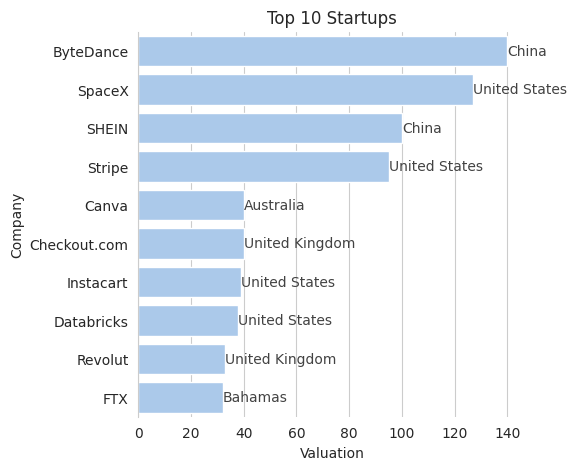

In [34]:
top_10_valuation = df.sort_values(by='Valuation', ascending=False).reset_index()[:10]

plt.figure(figsize=(5,5))

fig = sns.barplot(data=top_10_valuation, x='Valuation', y='Company', ci=None)
fig.set(title='Top 10 Startups', ylabel='Company',xlabel='Valuation')
fig.spines[['top','bottom','right']].set_visible(False)

for i, row in top_10_valuation.iterrows():
  fig.text(row['Valuation'], i, str(row['Country']), va='center', color='#424242')

plt.show()

Observando-se as top 10 startups mais valiosas do mundo, temos apenas startups com valor acima de 25 bi, sendo algumas pertencentes ao mesmo país. China e Estados Unidos ganham ainda mais destaque, mas ainda é possível notar a relevância de Austrália, Reino Unido e Bahamas nos cenário.

In [70]:
df.groupby('Country')['Company'].count().sort_values(ascending=False)[:10]

Country
United States     636
China             174
India              70
United Kingdom     46
Germany            29
France             24
Israel             22
Canada             19
South Korea        17
Brazil             17
Name: Company, dtype: int64

In [ ]:
df.loc[(df.Valuation >= 1) & (df.Valuation < 10), 'corn'] = 'Unicorn'
df.loc[(df.Valuation >= 10) & (df.Valuation < 100), 'corn'] = 'Decacorn'
df.loc[df.Valuation >= 100, 'corn'] = 'Hectocorn'

In [112]:
fig = go.Figure()

for c in countries:
    fig.add_trace(go.Violin(x = df['Valuation'][df['corn'] == 'Unicorn'][df['Country'] == c],
                            name = c))

fig.update_traces(orientation='h',
                  side='positive',
                  width=3,
                  points=False)

fig.update_layout(xaxis_showgrid=False,
                  xaxis_zeroline=False,

                  title='<b>Unicorns Valuation of Top 10 Countries<b>',
                  titlefont={'size': 24},
                  xaxis_title='Valuation in $Billions',

                  template='simple_white',
                  paper_bgcolor='#edeeee',
                  plot_bgcolor='#edeeee',

#                   width=1500,
#                   height=800
                 )
fig.show()

In [111]:
_ = df.loc[(df.corn == "Unicorn") & df.Country.isin(countries)]
_.groupby('Country').Valuation.mean().sort_values(ascending=False)[:10]

Country
Canada            2.591053
United Kingdom    2.555952
India             2.503235
France            2.434167
Germany           2.424286
Brazil            2.357647
United States     2.293791
Israel            2.182727
Australia         2.057143
China             1.943620
Name: Valuation, dtype: float64

Unicorns (1-10 B valuation) at a Glance:

*   **Young Unicorns:** Most of the means/medians fall nicely along the 1.6 - 2 range indicating a beginning emergence and progression of young unicorns.
*   **The unicorns are evolving:** Quite a few unicorns are near to their next evolution (Decacorn). Interestingly, these mostly come from the top 5 countries (US, China, UK, India, Germany).